# Assignment No. 1 

####PART 3####
####In this part, you are required to train and test a simple CNN model for image classification.####

####import libraries####

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.9.2


#### Download and import dataset CIFAR10 from https://www.cs.toronto.edu/~kriz/cifar.html#### 

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print("number of classes:", len(np.unique(y_train)))
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
print(labels)

number of classes: 10
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


####Explore dataset####

###If you have import dataset correctly, there are 10 classes of images, there are total 60,000 images, 10,000 is for test and 50,000 for training####

In [ ]:
print("Shape of train_images: ", x_train.shape, "and length of train_images: ",len(x_train))
print("Shape of train_images_labels: ", y_train.shape, "and length of train_images_labels: ",len(y_train))
print("Shape of test_images: ", x_test.shape, "and length of test_images: ",len(x_test))
print("Shape of test_images_labels: ", y_test.shape, "and length of test_images_labels: ",len(y_test))

Shape of train_images:  (50000, 32, 32, 3) and length of train_images:  50000
Shape of train_images_labels:  (50000, 1) and length of train_images_labels:  50000
Shape of test_images:  (10000, 32, 32, 3) and length of test_images:  10000
Shape of test_images_labels:  (10000, 1) and length of test_images_labels:  10000


####Print random images from dataset####

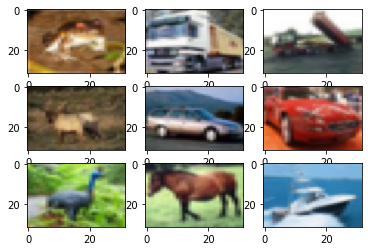

In [ ]:
figure, axis = plt.subplots(3, 3)
k = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

####Normalize pixels between 0 and 1####

In [ ]:
x_train=x_train/255
x_test=x_test/255

####Dataset preview####

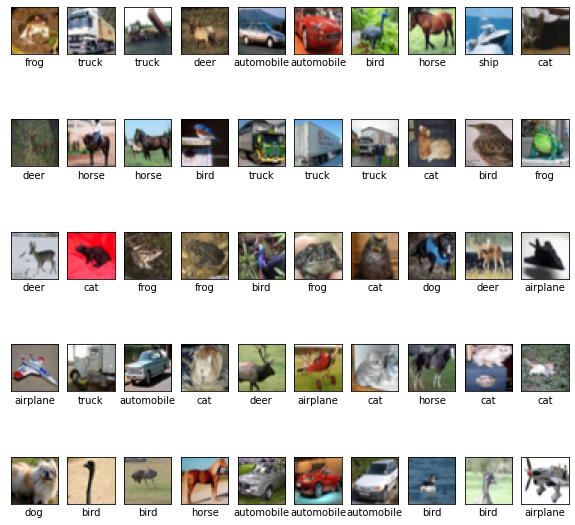

In [ ]:
#print atleast 50 images from dataset with their class names.
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(labels[y_train[i][0]])
plt.show()

####Build simple convolutional neural network using conv2D and Maxpooling layers####

In [ ]:
# reference help = https://www.geeksforgeeks.org/python-image-classification-using-keras/
model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(32, 32, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10)
])

####Print model summary####

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)         

####Compile the model####

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

####Fit the model####

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

####Evaluate the results####
####Evaluate the results and print on graphs####

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)